In [25]:
from utilities import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

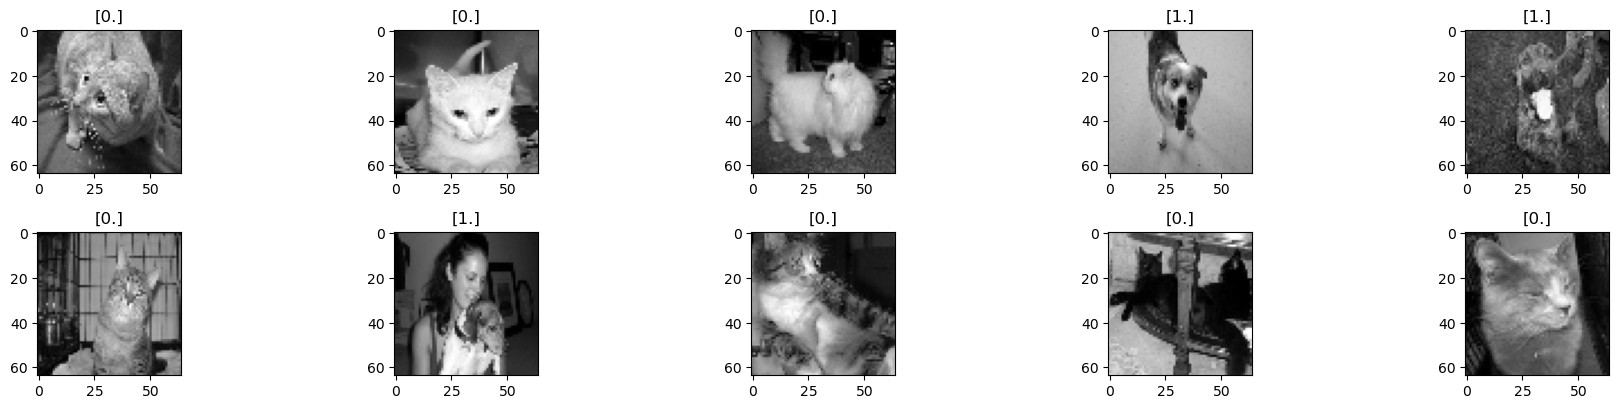

In [30]:
X_train, y_train, X_test, y_test = load_data()

plt.figure(figsize=(18,8))

for i in range(1,11):
    plt.subplot(4,5,i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [28]:
def norm_appla(set):
    newset = []
    for i in range(len(set)):
        
        im = set[i]
        
        new_im = []
        for j in range(64):
            for k in range(64):
                new_im.append(im[j][k]/255)
                
        newset.append(new_im)
    return(np.array(newset))

In [31]:
X_train = norm_appla(X_train)
X_test = norm_appla(X_test)

In [26]:
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return(W,b)

def model(X,W,b): 
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return(A)

def log_loss(A,y):
    return(1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1-A)))

def gradients(A, X, y): 
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W,b)

def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W,b = init(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(Loss)
    plt.show()
    
    return(W, b)
    

C:\Users\axels\AppData\Local\Temp\ipykernel_12012\2898531229.py:12: RuntimeWarning: divide by zero encountered in log
  return(1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1-A)))
C:\Users\axels\AppData\Local\Temp\ipykernel_12012\2898531229.py:12: RuntimeWarning: invalid value encountered in multiply
  return(1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1-A)))


[[1.30346946e-12]
 [1.71063495e-04]
 [1.39652228e-03]
 [5.46173239e-02]
 [1.10033661e-07]
 [2.87662457e-02]
 [1.56384612e-10]
 [2.37355754e-13]
 [3.09402654e-04]
 [1.16945631e-13]
 [8.00276476e-05]
 [4.70816624e-08]
 [8.15327892e-05]
 [6.52497092e-10]
 [4.37119080e-05]
 [1.48856572e-07]
 [3.60604987e-08]
 [9.86501190e-10]
 [3.46707877e-05]
 [1.70703077e-14]
 [5.11142719e-18]
 [1.58971513e-05]
 [1.45175145e-06]
 [1.86525656e-03]
 [3.81947295e-07]
 [1.08328833e-10]
 [3.30690303e-06]
 [2.10987196e-01]
 [1.92967871e-08]
 [4.04337213e-05]
 [1.67027369e-11]
 [6.72578647e-01]
 [2.10093867e-13]
 [3.50585029e-08]
 [2.03316203e-01]
 [1.21391380e-12]
 [6.03746995e-07]
 [7.14978010e-13]
 [1.11000315e-11]
 [1.59057810e-10]
 [6.50581902e-05]
 [1.39777890e-13]
 [9.99013751e-01]
 [2.48690637e-15]
 [4.85829886e-08]
 [9.55891237e-12]
 [2.98310280e-05]
 [3.23081230e-10]
 [9.28596160e-06]
 [3.20048533e-05]
 [9.85768668e-07]
 [5.40583460e-09]
 [1.03745545e-09]
 [1.62553375e-10]
 [3.18117815e-07]
 [3.461584

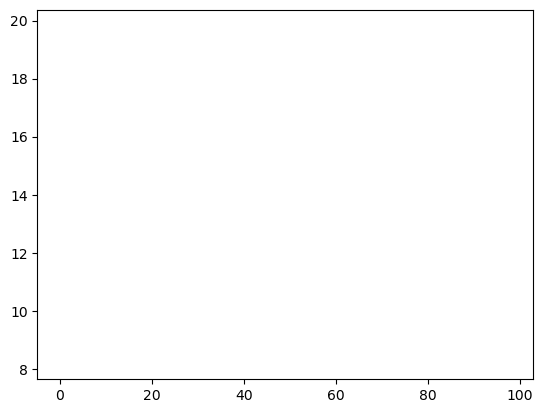

In [32]:
W , b=artificial_neuron(X_train, y_train)